## Atabey's Notes

You could have formatted the roll call number with `f"{roll_call:03}"`.

You saved your data as CSV but that doesn't work. I don't see how you read the data in that format.

- Q1: Calculations don't make much sense.
- Q2: Seems ok.
- Q3: Numbers are not correct.

10 + 25 + 15 + 0 = 50/100

In [156]:
from urllib.request import urlopen
import xmltodict
import pandas as pd
from collections import defaultdict
import heapq
from operator import itemgetter
import numpy as np
from datetime import datetime

In [86]:
data = []

I used the appropriate link to pull the data. I collected each year's data in an array and then transferred the array containing each year's data into another array.  Since I finished this question before you posted the last announcement, I did the data extraction and analysis part in one place

In [87]:

for year in range(1990,2024):
    data.append([])
    count = 0
    try:
        i = 1
        while True:
                roll_call = str(i)
                roll_call = "0" * (3 - len(roll_call)) + roll_call
                with urlopen("https://clerk.house.gov/evs/" + str(year) + "/roll" + str(roll_call) + ".xml") as url:
                    raw = xmltodict.parse(url.read())
                
                data[year - 1990].append(raw)
                i += 1
                count += 1
                if i % 100 == 0:
                    print(year,i)
    except:
        
        print(year, " Yılında " , count, " kadar veri var.")
        continue
    


1990 100
1990 200
1990 300
1990 400
1990 500
1990  Yılında  536  kadar veri var.
1991 100
1991 200
1991 300
1991 400
1991  Yılında  444  kadar veri var.
1992 100
1992 200
1992 300
1992 400
1992  Yılında  488  kadar veri var.
1993 100
1993 200
1993 300
1993 400
1993 500
1993 600
1993  Yılında  615  kadar veri var.
1994 100
1994 200
1994 300
1994 400
1994 500
1994  Yılında  507  kadar veri var.
1995 100
1995 200
1995 300
1995 400
1995 500
1995 600
1995 700
1995 800
1995  Yılında  885  kadar veri var.
1996 100
1996 200
1996 300
1996 400
1996  Yılında  455  kadar veri var.
1997 100
1997 200
1997 300
1997 400
1997 500
1997 600
1997  Yılında  640  kadar veri var.
1998 100
1998 200
1998 300
1998 400
1998 500
1998  Yılında  547  kadar veri var.
1999 100
1999 200
1999 300
1999 400
1999 500
1999 600
1999  Yılında  611  kadar veri var.
2000 100
2000 200
2000 300
2000 400
2000 500
2000 600
2000  Yılında  603  kadar veri var.
2001 100
2001 200
2001 300
2001 400
2001 500
2001  Yılında  512  kadar ve

In [88]:
df = pd.DataFrame(data)

In [89]:
df.to_csv("data.csv")

I saved the data I extracted as data.csv for later use. When I was going to use it, I imported this data and used it.

In [2]:
imported = pd.read_csv("data.csv")

In [3]:
imported = imported.fillna(0)

### Q1.1

I first wrote a function to find the most absent person every year in the roll call. This function takes the data of a year and selects only the ones in the quorum type from this data and passes other types of data. In the quorum data, if the legislator is not present in that election, I incremented his score by one and finally returned the 10 most absent people in that year as a dictionary. I did this for each year in order from 1990 to 2023 and stored it in an array named Quotes_by_years. Each element of the list represents the year 1990 after the index number. I made a few sample demonstrations.

In [142]:
def Quorum(data):
    quorum = defaultdict(int)
    for roll_call_str in data[1:]:
        if not roll_call_str:
            break

        roll_call = eval(roll_call_str)
        if roll_call["rollcall-vote"]["vote-metadata"]["vote-type"] != 'QUORUM':
            continue


        for legislator in roll_call["rollcall-vote"]["vote-data"]["recorded-vote"]:
            if legislator["vote"] == "Not Voting":
                quorum[(legislator["legislator"]["#text"],legislator["legislator"]["@state"])] += 1

    return dict(heapq.nlargest(10, quorum.items(), key=itemgetter(1)))
        
    
            

In [149]:
Quotes_by_years = [Quorum(imported.iloc[year]) for year in range(34)]

In [156]:
Quotes_by_years[10]

{('Gekas', 'PA'): 3,
 ('McIntosh', 'IN'): 3,
 ('Scarborough', 'FL'): 3,
 ('Abercrombie', 'HI'): 2,
 ('Barton', 'TX'): 2,
 ('Berman', 'CA'): 2,
 ('Campbell', 'CA'): 2,
 ('Chambliss', 'GA'): 2,
 ('Danner', 'MO'): 2,
 ('Doggett', 'TX'): 2}

In [158]:
Quotes_by_years[33]

{('Payne', 'NJ'): 2,
 ('Gonzalez, Vicente', 'TX'): 2,
 ('Van Orden', 'WI'): 2,
 ('McEachin', 'VA'): 1,
 ('Bilirakis', 'FL'): 1,
 ('Hunt', 'TX'): 1,
 ('Smith (WA)', 'WA'): 1,
 ('Wexton', 'VA'): 1,
 ('Boyle (PA)', 'PA'): 1,
 ('Correa', 'CA'): 1}

### Q1.2

For this question, I scanned all the data from 1990 to 2023. I allocated a set for each state that voted and added the name of everyone who voted from that state to the set. After scanning all the votes, I returned the name of each state and the length of the set for that state in a dictionary.

In [138]:
def Count_Legislator(data):
    legislator_set = defaultdict(set)
    for i in range(34):
        
        data = imported.iloc[i]
        for roll_call_str in data[1:]:
            if not roll_call_str:
                break

            roll_call = eval(roll_call_str)
            
            if not roll_call["rollcall-vote"]["vote-data"]:
                continue   

            for legislator in roll_call["rollcall-vote"]["vote-data"]["recorded-vote"]:
                legislator_set[legislator["legislator"]["@state"]].add(legislator["legislator"]["#text"])
                
        print(str(i) + " is done.")
    return {i: len(j) for i,j in legislator_set.items()}

In [139]:
Count_Legislators = Count_Legislator(imported)

0 is done.
1 is done.
2 is done.
3 is done.
4 is done.
5 is done.
6 is done.
7 is done.
8 is done.
9 is done.
10 is done.
11 is done.
12 is done.
13 is done.
14 is done.
15 is done.
16 is done.
17 is done.
18 is done.
19 is done.
20 is done.
21 is done.
22 is done.
23 is done.
24 is done.
25 is done.
26 is done.
27 is done.
28 is done.
29 is done.
30 is done.
31 is done.
32 is done.
33 is done.


In [142]:
Count_Legislators

{'NY': 122,
 'HI': 12,
 'AR': 21,
 'CA': 175,
 'TX': 122,
 'IL': 74,
 'OH': 71,
 'WI': 32,
 'MA': 31,
 'OR': 21,
 'LA': 32,
 'NC': 52,
 'GA': 56,
 'VA': 52,
 'FL': 117,
 'MD': 27,
 'NE': 11,
 'AL': 28,
 'NV': 16,
 'MI': 63,
 'PA': 86,
 'ME': 12,
 'CO': 32,
 'MO': 29,
 'KY': 25,
 'IN': 43,
 'DE': 4,
 'WA': 37,
 'TN': 35,
 'NJ': 44,
 'ID': 12,
 'SC': 26,
 'ND': 5,
 'NH': 14,
 'OK': 30,
 'MS': 18,
 'MN': 37,
 'CT': 18,
 'KS': 27,
 'IA': 21,
 'UT': 19,
 'SD': 6,
 'AZ': 33,
 'RI': 10,
 'MT': 9,
 'WV': 11,
 'NM': 21,
 'VT': 5,
 'WY': 5,
 'AK': 3,
 'XX': 18}

### Q1.3


For this question, I stored the dates each legislator voted, their name, state, party, how many times they voted and how many times they didn't vote in a dictionary, then converted each element into a dataFrame and merged them together.

In [189]:
def FindDetails(data):
    rows = dict()
    for roll_call_str in data[1:]:
        if type(roll_call_str) == float:
            break

        roll_call = eval(roll_call_str)
        if roll_call["rollcall-vote"]["vote-metadata"]["vote-type"] != 'QUORUM':
            continue


        for legislator in roll_call["rollcall-vote"]["vote-data"]["recorded-vote"]:
            if (roll_call["rollcall-vote"]["vote-metadata"]["action-date"],legislator["legislator"]["#text"],legislator["legislator"]["@state"],legislator["legislator"]["@party"]) not in rows.keys():
                rows[(roll_call["rollcall-vote"]["vote-metadata"]["action-date"],legislator["legislator"]["#text"],legislator["legislator"]["@state"],legislator["legislator"]["@party"])] = [0,0]
            if legislator["vote"] == "Not Voting":
                rows[(roll_call["rollcall-vote"]["vote-metadata"]["action-date"],legislator["legislator"]["#text"],legislator["legislator"]["@state"],legislator["legislator"]["@party"])][1] += 1
            else:
                rows[(roll_call["rollcall-vote"]["vote-metadata"]["action-date"],legislator["legislator"]["#text"],legislator["legislator"]["@state"],legislator["legislator"]["@party"])][0] += 1

    return rows


In [190]:
Details = pd.DataFrame({})

In [191]:
for year in range(34):
    rows_by_years = FindDetails(imported.iloc[year])
    new_row = dict()
    for key, value in rows_by_years.items():
        date, name, state, party = key
        voted, not_voted = value
        date = datetime.strptime(date, "%d-%b-%Y")
        new_row["Date"] = date
        new_row["Name"] = name
        new_row["State"] = state
        new_row["Party"] = party
        new_row["Voted"] = voted
        new_row["Not Voted"] = not_voted
        Details = pd.concat([Details, pd.DataFrame([new_row])], ignore_index=True)
        
    
    

In [192]:
Details

,Date,Name,State,Party,Voted,Not Voted
0,1990-01-23,Ackerman,NY,D,1,0
1,1990-01-23,Akaka,HI,D,1,0
2,1990-01-23,Alexander,AR,D,1,0
3,1990-01-23,Anderson,CA,D,1,0
4,1990-01-23,Andrews (TX),TX,D,1,0
...,...,...,...,...,...,...
71521,2023-10-25,Wilson (SC),SC,R,1,0
71522,2023-10-25,Wittman,VA,R,1,0
71523,2023-10-25,Womack,AR,R,1,0
71524,2023-10-25,Yakym,IN,R,1,0


In [193]:
Details.to_csv("Details.csv")

To avoid recalculating the Details dataframe every time, I wrote it in a file so that I could just import it the next time.

In [144]:
Details = pd.read_csv("Details.csv")

In [145]:
dateDetails = list(Details["Date"])
justYear = []
for i,j in enumerate(dateDetails):
    dateDetails[i] = datetime.strptime(j, "%Y-%m-%d")
    justYear.append(dateDetails[i].year)
Details["Date"] = dateDetails

In order to find the person who has been in service the longest, I converted the date part of the details dataframe to just the year. After grouping the dataframe by names, I subtracted the year in which each name was last voted from the year in which it was first voted, so I found out how many years everyone has been in office.

In [153]:
clean_year_details = Details.copy()
clean_year_details["Date"] = justYear
longest = clean_year_details.groupby("Name")["Date"].agg(np.ptp)
longest.sort_values(ascending = False)[:10]

Name
Hayes        33
Panetta      33
Kildee       33
Pallone      33
Owens        33
Hoyer        33
Craig        33
Schiff       33
Schneider    33
Evans        33
Name: Date, dtype: int64

### Q2

For this question, I first wrote a function that does the polarization operation for the vote.

In [160]:
def MeasurePolarization(vote):
    votes = vote["rollcall-vote"]["vote-metadata"]["vote-totals"]["totals-by-party"]
    
    RepY = int(votes[0]["yea-total"])
    RepN = int(votes[0]["nay-total"])
    DemY = int(votes[1]["yea-total"])
    DemN = int(votes[1]["nay-total"])
    
    total = RepY + RepN + DemY + DemN
    if total == 0:    total += 1
    pol = (abs(RepY - DemY) + abs(RepN - DemN)) / total
    
    return pol
    

In [161]:
Polarizations = pd.DataFrame()

I then used this function to calculate the polarization of each vote each year and saved it in the Polarizations dataframe

In [163]:
for row in range(34):
    for data_str in imported.iloc[row][1:]:
        if type(data_str) != str:
            break
        data = eval(data_str)
        
        if "rollcall-vote" not in data:
            continue
        
        if "vote-metadata" not in data["rollcall-vote"]:
            continue
            
        if "vote-totals" not in data["rollcall-vote"]["vote-metadata"]:
            continue
        
        if "totals-by-party" not in data["rollcall-vote"]["vote-metadata"]["vote-totals"]:
            continue
        
        pol = MeasurePolarization(data)
        date = data["rollcall-vote"]["vote-metadata"]["action-date"]
        date = datetime.strptime(date, "%d-%b-%Y")
        
        df = pd.DataFrame([{"Date": date, "Polarization": pol}])
        Polarizations = pd.concat([Polarizations, df], ignore_index=True)
    print(str(row) + ". row done.")

0. row done.
1. row done.
2. row done.
3. row done.
4. row done.
5. row done.
6. row done.
7. row done.
8. row done.
9. row done.
10. row done.
11. row done.
12. row done.
13. row done.
14. row done.
15. row done.
16. row done.
17. row done.
18. row done.
19. row done.
20. row done.
21. row done.
22. row done.
23. row done.
24. row done.
25. row done.
26. row done.
27. row done.
28. row done.
29. row done.
30. row done.
31. row done.
32. row done.
33. row done.


In order to plot the polarization, I grouped them by year and calculated the average of each year and then plotted it.

Looking at the graph, we can say the following: From 1990 to 1995, the polarization increases, and from 1995 to 2000, there is a serious decline. Then it climbs up again in a 5-year period. Until 2015, these 5-year changes are experienced continuously. From 2015 to 2023, there are relatively small but sudden rises and falls in short periods.

<Axes: xlabel='Date'>

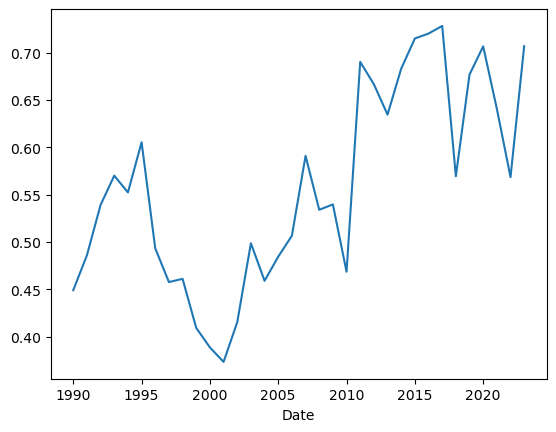

In [164]:
Polarizations.groupby(Polarizations["Date"].dt.year)["Polarization"].mean().plot()

### Q3.1


For this question, I used the details dataframe I calculated in the question above. I grouped the dataframe by the names of the legislators and imported the sum of the votes cast into a new dataframe

In [270]:
yearly_voted = clean_year_details.groupby("Name")["Voted"].sum()
yearly_voted

Name
Abercrombie     120
Abraham           7
Ackerman        148
Adams            18
Aderholt         75
               ... 
Zeliff           75
Zimmer           78
Zinke             9
de Lugo (VI)     16
de la Garza      92
Name: Voted, Length: 1713, dtype: int64

### Q3.2

For this question, I wrote a function to calculate how many votes each legislator was aligned with his/her party in that year and how many votes he/she was aligned against his/her party in that year. First, I determined the alignment of each party in that election with -1 0 or 1 and then I found the number of voters who voted in line with this alignment or not.

In [97]:
def FindDetails(data):
    rows = dict()
    for roll_call_str in data[1:]:
        if type(roll_call_str) != str:
            break

        data = eval(roll_call_str)
        
        if "rollcall-vote" not in data:
            continue

        if "vote-metadata" not in data["rollcall-vote"]:
            continue
        
        if data["rollcall-vote"]["vote-metadata"]["vote-type"] == 'QUORUM':
            continue
        
        if "vote-data" not in data["rollcall-vote"]:
            continue
        
        if data["rollcall-vote"]["vote-data"] is None:
            continue
        
        if "recorded-vote" not in data["rollcall-vote"]["vote-data"]:
            continue
        
        if "vote-totals" not in data["rollcall-vote"]["vote-metadata"]:
            continue
        
        if "totals-by-party" not in data["rollcall-vote"]["vote-metadata"]["vote-totals"]:
            continue
            

        
        votes = data["rollcall-vote"]["vote-metadata"]["vote-totals"]["totals-by-party"]
    
        RepY = int(votes[0]["yea-total"])
        RepN = int(votes[0]["nay-total"])
        DemY = int(votes[1]["yea-total"])
        DemN = int(votes[1]["nay-total"])
        
        rep = 0
        if RepY > RepN:
            rep = 1
        elif RepY < RepN:
            rep = -1
        
        dem = 0
        if DemY > DemN:
            dem = 1
        elif DemY < DemN:
            dem = -1
        party_results = defaultdict(int)
        party_results["D"] = dem
        party_results["R"] = rep
            

        
        for legislator in data["rollcall-vote"]["vote-data"]["recorded-vote"]:
            party = legislator["legislator"]["@party"]

            
            if (legislator["legislator"]["#text"],legislator["legislator"]["@state"],legislator["legislator"]["@party"]) not in rows.keys():
                rows[(legislator["legislator"]["#text"],legislator["legislator"]["@state"],legislator["legislator"]["@party"])] = [0,0]
                
            if legislator["vote"] == "Yea":
                vote = 1
            else:
                vote = -1
            
            if party_results[party] != 0:
                if party_results[party] == vote:
                    rows[(legislator["legislator"]["#text"],legislator["legislator"]["@state"],legislator["legislator"]["@party"])][0] += 1
                else:
                    rows[(legislator["legislator"]["#text"],legislator["legislator"]["@state"],legislator["legislator"]["@party"])][1] += 1

      
    return rows


I stored each year's along and break results as separate dictionaries in alongs_and_breaks array.

In [99]:
alongs_and_breaks = []

for i in range(34):
    data = FindDetails(imported.iloc[i])
    alongs_and_breaks.append(data)
    print(str(i + 1990) + ". year done.")

1990. year done.
1991. year done.
1992. year done.
1993. year done.
1994. year done.
1995. year done.
1996. year done.
1997. year done.
1998. year done.
1999. year done.
2000. year done.
2001. year done.
2002. year done.
2003. year done.
2004. year done.
2005. year done.
2006. year done.
2007. year done.
2008. year done.
2009. year done.
2010. year done.
2011. year done.
2012. year done.
2013. year done.
2014. year done.
2015. year done.
2016. year done.
2017. year done.
2018. year done.
2019. year done.
2020. year done.
2021. year done.
2022. year done.
2023. year done.


### Q3.2

Each year I checked all votes of all people to find those who never broke the party line and recorded the number of people who did not break with their party line that year.

In [120]:
never_broke = []
for year in range(34):
    yearly_broke = defaultdict(int)
    for person, vote in alongs_and_breaks[year].items():
        name, state, party = person
        if vote[1] == 0:
            yearly_broke[party] += 1
    never_broke.append(yearly_broke)
    
for i in range(34):
    if len(never_broke[i].keys()) > 0:
        print(str(i + 1990) + ": ", end = "")
        for j,k in never_broke[i].items():
            print(j,k, end = " ")
        print("")
    

1991: I 1 
1992: I 1 
1993: D 2 I 1 
1994: I 1 
1995: I 1 
1996: I 1 
1997: I 2 
1998: I 1 D 1 
1999: I 1 
2000: I 2 
2001: I 2 
2002: I 2 
2003: I 1 
2004: I 1 
2005: I 1 
2006: I 1 
2007: R 1 
2009: I 2 
2019: I 1 
2020: I 2 D 1 
2021: D 2 R 1 
2022: D 1 


### Q3.4

For this question, I made a list of the people who broke the party line the most each year and returned 5 names that broke the line.

In [127]:
most_broke = []
for year in range(34):
    yearly_most = []

    
    for person, vote in alongs_and_breaks[year].items():
        name, state, party = person
        heapq.heappush(yearly_most, (name,state,vote[1]))

    most_broke.append(heapq.nlargest(5, yearly_most))


most_broke
        

[[('de la Garza', 'TX', 148),
  ('Young (FL)', 'FL', 193),
  ('Young (AK)', 'AK', 202),
  ('Yatron', 'PA', 152),
  ('Yates', 'IL', 163)],
 [('de la Garza', 'TX', 114),
  ('Zimmer', 'NJ', 149),
  ('Zeliff', 'NH', 151),
  ('Young (FL)', 'FL', 153),
  ('Young (AK)', 'AK', 160)],
 [('de la Garza', 'TX', 146),
  ('Zimmer', 'NJ', 149),
  ('Zeliff', 'NH', 146),
  ('Young (FL)', 'FL', 148),
  ('Young (AK)', 'AK', 164)],
 [('de la Garza', 'TX', 227),
  ('de Lugo (VI)', 'XX', 78),
  ('Zimmer', 'NJ', 259),
  ('Zeliff', 'NH', 238),
  ('Young (FL)', 'FL', 250)],
 [('de la Garza', 'TX', 184),
  ('de Lugo (VI)', 'XX', 82),
  ('Zimmer', 'NJ', 213),
  ('Zeliff', 'NH', 208),
  ('Young (FL)', 'FL', 196)],
 [('de la Garza', 'TX', 415),
  ('Zimmer', 'NJ', 284),
  ('Zeliff', 'NH', 238),
  ('Young (FL)', 'FL', 253),
  ('Young (AK)', 'AK', 262)],
 [('de la Garza', 'TX', 194),
  ('Zimmer', 'NJ', 167),
  ('Zeliff', 'NH', 129),
  ('Young (FL)', 'FL', 166),
  ('Young (AK)', 'AK', 137)],
 [('Young (FL)', 'FL', 227

I couldn't do the last question

In [136]:
for i in range(100,120):
    asd = imported.iloc[0][i]
    asd = eval(asd)
    print(asd["rollcall-vote"]["vote-metadata"]["vote-question"])

On Approving the Journal
ON MOTION TO PROCEED IN ORDER
MOTION TO INSTRUCT CONFEREES
On Agreeing to the Conference Report
On Agreeing to the Resolution
On Agreeing to the Amendment
On Motion to Recommit with Instructions
On Passage
SUSPEND THE RULES AND AGREE
On Approving the Journal
On Agreeing to the Resolution
On Passage
On Approving the Journal
On Ordering the Previous Question
On Agreeing to the Resolution
Call of the House
On Agreeing to the Amendment
On Agreeing to the Amendment
On Agreeing to the Amendment
On Agreeing to the Amendment


'Call of the House'